# **PV System Design Project - Final Report**
## *Gurveer Singh, Z5361200*
The following document showcases the code and reasoning informing the PV design project. The aim of the project is to design a stand-alone PV system for a rural location, to be fully sustainable and supply adequate energy throughout the year. As such many parameters are analysised concurrently to derive an ideal system which balances efficiency, lifetime (days of autonomy), maximum sunlight collection and cost. Throughout the report, justifications are provided for important design decisions. Where relevent, important formulas are referenced and appropriate standards and datasheets have been provided in the appendix. Performance markers including economics metrics are calculated towards the end of the report and the ability of the system to meet the objectives is assessed.

Lastly, it should be noted that the approach for the project is to design a system that has maximised system performance for the worst month thoughout the year, in regards to resources (sunlight) available. 

## Importing the relevant libraries 

In [1]:
import pandas as pd # Data Analysis 
import numpy as np # Number Manipulation 
import matplotlib.pyplot as plt # Graphing Data 
from IPython.display import HTML # Hyperlink
from IPython.display import Image # Displaying Images

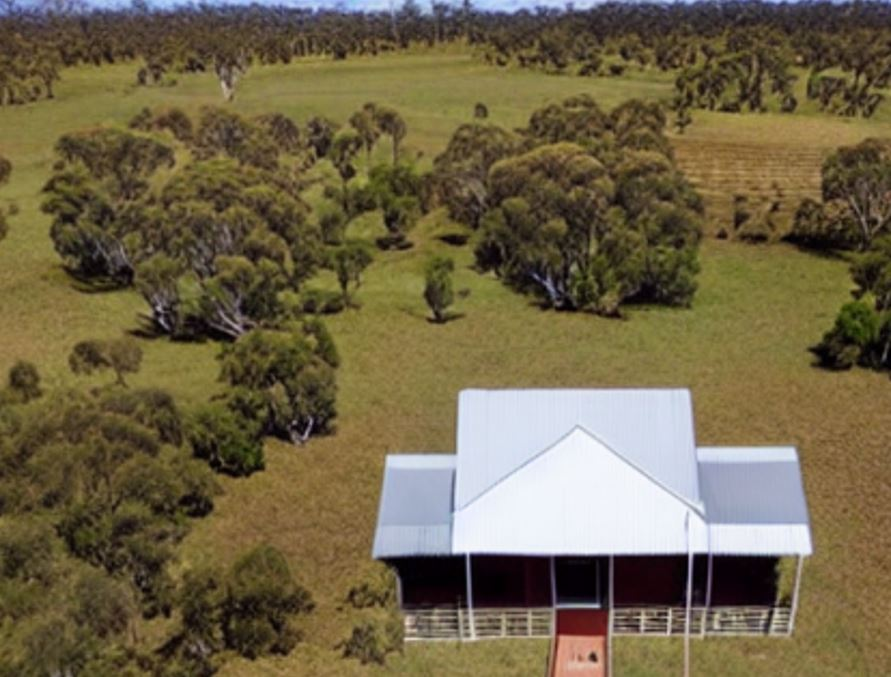

In [2]:
Image(filename='house_front.jpg') 

# DC Load Assessment
***
- In this section, the DC loads experienced by the system are collected and evaluated.
- At the end of this section, the total DC demands the system must meet, such as maximum demand, are presented.
- Reasons for specific design decisions are highlighted throughout.
- This will be used in conjunction with the AC load assessment to inform system design decisions.
***

### DC Device Power Justification
- For DC devices, it is important to considered their average power usage. 
- In the given scenario, the system must supply a fluorescent light, and a fridge. 
- For an example fluorescent light, see [here](https://tinyurl.com/2fze4p8c). The example for the 36W light was used.
- For an example fridge, see here. The power usage was taken from [here](https://tinyurl.com/yc726hmf). Average power of 53.3W was derived. 

### Code

In [3]:
# Base values regarding the usage of the DC devices in each month. See above for power justification.
appliance_dc = ['Fluorescent light ','Fridge', 'Total']
n_dc = np.array([1,1,np.nan])
Power_dc = np.array([36,53,np.nan])
Usage_summer_dc = np.array([5,24,np.nan])
Usage_winter_dc = np.array([7,24,np.nan])

In [4]:
# Daily energy usage is the product of the the number of devices, power usage of each device, and the time the devices are used for.
energy_summer_dc = n_dc*Power_dc*Usage_summer_dc
energy_winter_dc = n_dc*Power_dc*Usage_winter_dc 

In [5]:
# Maximum DC demand is considered when both devices are running concurrently.
dc_demand_contri  = n_dc*Power_dc

# Calculate the DC power supply characteristics. 
daily_load_winter_DC = np.nansum(energy_winter_dc)
daily_load_summer_DC = np.nansum(energy_summer_dc)
max_dc_demand = np.nansum(dc_demand_contri)
energy_winter_dc[2] = daily_load_winter_DC
energy_summer_dc[2] = daily_load_summer_DC
dc_demand_contri[2] = max_dc_demand
dc_load_reference = np.array(['https://tinyurl.com/2fze4p8c','https://tinyurl.com/yc726hmf',''])

# Table format displaying power characteristics of each DC device.
DC_load = pd.DataFrame({'Appliance':appliance_dc,
                        'Number':n_dc,'Power (W)':Power_dc,
                        'Usage Winter (h)':Usage_winter_dc,
                        'Energy Consumption Winter (Wh)':energy_winter_dc,
                        'Usage Summer (h)':Usage_summer_dc,
                        'Energy Consumption Summer (Wh)':energy_summer_dc, 
                        'Contribution to Maximum DC Demand (W)':dc_demand_contri, 
                        'References':dc_load_reference})

### DC Load Table

In [6]:
HTML(DC_load.to_html(render_links=True, escape=False))

,Appliance,Number,Power (W),Usage Winter (h),Energy Consumption Winter (Wh),Usage Summer (h),Energy Consumption Summer (Wh),Contribution to Maximum DC Demand (W),References
0,Fluorescent light,1.0,36.0,7.0,252.0,5.0,180.0,36.0,https://tinyurl.com/2fze4p8c
1,Fridge,1.0,53.0,24.0,1272.0,24.0,1272.0,53.0,https://tinyurl.com/yc726hmf
2,Total,NaN,NaN,NaN,1524.0,NaN,1452.0,89.0,


# AC Load Assessment
***
- In this section, the AC loads experienced by the system are collected and evaluated.
- At the end of this section, the total AC demands the system must meet, such as maximum demand and maximum surge demand, are presented.
- Reasons for specific design decisions are highlighted throughout, such as what appliances may be concurrently running and contribute to the maximum demand.
- This will be used in conjunction with the DC load assessment to inform system design decisions throughout the report.
***

### AC Device Power Justification
- For AC devices, there are more factors to consider than DC devices. The power usage of each component each season must be considered, but also the surge and power factors and their associated powers. The maximum demand must consider what combination of devices can be reasonably considred to be running at the same time, and what combination produces the maximum power so that the system is not under-designed. Additionally, the surge demand must also be evaluated for the choice of inverter later on.
- For the TV, see [here](https://tinyurl.com/3ryr6tyw) for an example device. Power and surge factor are not required as they are not considered for maximum demands.
- For the Stereo, this [example](https://tinyurl.com/5dk26zue) was used with rms power usage of 25W. The pf and sf are irrelevent as it is not considered for max. demand.
- For the Computer, see [here](https://tinyurl.com/bu97z5nu). Computer power supplies are commonly pf-corrected and hence a pf of 0.98 is reasonable.
- For the Dishwasher, see [here](https://tinyurl.com/4ayv8p55). Induction motor and thus a pf of ~0.7 is adequate.
- For the Blender, 500W is an average blender power rating. Inductive motor and thus a sf of 3 is reasonable.
- For the Hot Plate, information was obtained from [here](https://tinyurl.com/bdk6kxxx). As hot plates are almost purely resistive, pf = 1. 
- For the maximum demand, the case where the hot-plate, computer, and dishwasher are running at the same time. This combination of appliances is reasonable for a single-person household, and results in the highest power draw such that the system is not underdesigned. The TV and Stereo are relatively low power devices, and the blender does not make sense to be running at the same time as the others. Thus we arrive at our chosen combination. The power factors mentioned above have been used.
- For the maximum surge demand, we assume the blender is switched on at the same time as the hot plate, dishwasher and computer are running. This is a likely scenario and the blender has a high surge factor due to it's AC motor. Thus this combination was chosen.

### Code

In [7]:
# Characteristics of the AC devices. See above for justification on design decisions. 
appliance_ac = ['TV','Stereo','Computer','Dishwasher','Blender','Hot Plate','Total']
n_ac = np.array([1,1,1,1,1,1,np.nan])
Power_ac = np.array([90,25,90,1700,500,1200,np.nan])
Usage_summer_ac = np.array([4,3,4,0.76,0.02,0.02,np.nan])
Usage_winter_ac = np.array([2,3,4,0.60,0.02,0.05,np.nan])

# For devices which do not contribute to maximum demand, set Pf_ac = nan.
pf = np.array([np.nan,np.nan,0.98,0.7,np.nan,1,np.nan])

# For devices which do not contribute to surge demand, set Pf_ac = nan.
sf = np.array([np.nan,np.nan,np.nan,np.nan,3,1,np.nan])

# Array for the potential (design) surge power. A '1' indicates either a surge factor of 1 for the device, or that the device was 
# already on before the surge devices were turned on, thus contributing to the total wattage required but not causing a surge. 
sf_design = np.array([np.nan,np.nan,1,1,3,1,np.nan])

In [8]:
# Calculate the energy used by the system over a day, in both summer and winter.
energy_summer_ac = n_ac*Power_ac*Usage_summer_ac
energy_winter_ac = n_ac*Power_ac*Usage_winter_ac 

In [9]:
# Calculate the expected maximum demand (constant) and the maximum surge demand. 
ac_demand_contribution = (n_ac*Power_ac)/pf
contri_demand_pot = n_ac*Power_ac*sf
contri_demand_des = n_ac*Power_ac*sf_design

In [10]:
# Calculate the total AC characteristics of all loads.
daily_load_winter_AC = np.nansum(energy_winter_ac)
daily_load_summer_AC = np.nansum(energy_summer_ac)
max_ac_demand = np.nansum(ac_demand_contribution)
surge_demand = np.nansum(contri_demand_des)

energy_winter_ac[6] = daily_load_winter_AC
energy_summer_ac[6] = daily_load_summer_AC
ac_demand_contribution[6] = max_ac_demand
contri_demand_des[6] = surge_demand
ac_load_reference = np.array(['https://tinyurl.com/3ryr6tyw','https://tinyurl.com/5dk26zue','https://tinyurl.com/bu97z5nu','https://tinyurl.com/4ayv8p55','','https://tinyurl.com/bdk6kxxx',''])

In [11]:
# Create a table to display the AC laod assessment. 
AC_load = pd.DataFrame({'Appliance':appliance_ac,
                        'Number':n_ac,'Power (W)':Power_ac,
                        'Usage Winter (h)':Usage_winter_ac,
                        'Energy Winter (Wh)':energy_winter_ac,
                        'Usage Summer (h)':Usage_summer_ac,
                        'Energy Summer (Wh)':energy_summer_ac,
                        'Power Factor':pf, 
                        'Contribution to Maximum Demand (VA)':ac_demand_contribution, 
                        'Surge Factor':sf, 
                        'Contribution to Surge Demand [Design] (VA)':contri_demand_des,
                        'References':ac_load_reference})

### AC Load Table

In [76]:
HTML(AC_load.to_html(render_links=True, escape=False))

,Appliance,Number,Power (W),Usage Winter (h),Energy Winter (Wh),Usage Summer (h),Energy Summer (Wh),Power Factor,Contribution to Maximum Demand (VA),Surge Factor,Contribution to Surge Demand [Design] (VA),References
0,TV,1.0,90.0,2.00,180.0,4.00,360.0,NaN,NaN,NaN,NaN,https://tinyurl.com/3ryr6tyw
1,Stereo,1.0,25.0,3.00,75.0,3.00,75.0,NaN,NaN,NaN,NaN,https://tinyurl.com/5dk26zue
2,Computer,1.0,90.0,4.00,360.0,4.00,360.0,0.98,91.836735,NaN,90.0,https://tinyurl.com/bu97z5nu
3,Dishwasher,1.0,1700.0,0.60,1020.0,0.76,1292.0,0.70,2428.571429,NaN,1700.0,https://tinyurl.com/4ayv8p55
4,Blender,1.0,500.0,0.02,10.0,0.02,10.0,NaN,NaN,3.0,1500.0,
5,Hot Plate,1.0,1200.0,0.05,60.0,0.02,24.0,1.00,1200.000000,1.0,1200.0,https://tinyurl.com/bdk6kxxx
6,Total,NaN,NaN,NaN,1705.0,NaN,2121.0,NaN,3720.408163,NaN,4490.0,


# Miscellaneous System Design Information
***
- In this section, more information such as the system voltage and panel mounting angle are included. 
- The AC and DC data are used in this section to inform the analysis.
***

In [13]:
# Summer and winter months for Australia, required to index the weather data.
summer_months = ['Oct, Nov, Dec, Jan, Feb, Mar']
winter_months = ['Apr, May, Jun, Jul, Aug, Sep']

# Assumed inverter efficency. Inverters are much more efficient but we wish to oversize the system for availability.
inverter_eff = 0.8

In [14]:
# The total daily load for winter months is the sum of the AC and DC demand previously calcualted. 
winter_des_load_energy = daily_load_winter_AC/inverter_eff + daily_load_winter_DC 

In [15]:
# The total daily load for summer months is the sum of the AC and DC demand previously calcualted. 
summer_des_load_energy = daily_load_summer_AC/inverter_eff + daily_load_summer_DC

### Design System Variables
- As of now, the panel is roof mounted and thus it's angle is determined by the given angle of the roof. Justification for why we will keep the panel roof mounted will be provided later. 
- Due to the high daily power usage (~4kWh in both summer and winter), the system will operate at 24V for efficiency and the minmisation of power loss. This reduces the current at the DC bus and thus the power loss.

In [16]:
# The angle of the panel to the horizontal.
beta = 37

# The optimal DC voltage for the system to operate at.
Vdc = 24

# Maximum power demand at DC bus, going through the inverter.
max_demand_dc_bus = max_ac_demand*0.8/inverter_eff + max_dc_demand

# Maximum current at DC bus, required for cable ratings, function of system voltage described above.
dc_current_at_max_demand = max_demand_dc_bus/Vdc

In [17]:
# Table format for miscellaneous system design information.
mp = pd.DataFrame({'Summer Months':summer_months,
                   'Winter Months':winter_months,
                   'Winter design load energy (Wh)':winter_des_load_energy,
                   'Summer design load energy (Wh)':summer_des_load_energy,
                   'DC bus voltage (V)':Vdc,
                   'Panel Angle':beta,
                   'Maximum demand at DC bus (W)':max_demand_dc_bus,
                   'Maximum current demand at DC bus (A)':dc_current_at_max_demand,
                   'System Configuration':'MPPT'})
mp

,Summer Months,Winter Months,Winter design load energy (Wh),Summer design load energy (Wh),DC bus voltage (V),Panel Angle,Maximum demand at DC bus (W),Maximum current demand at DC bus (A),System Configuration
0,"Oct, Nov, Dec, Jan, Feb, Mar","Apr, May, Jun, Jul, Aug, Sep",3655.25,4103.25,24,37,3809.408163,158.72534,MPPT


# Weather Information Processing and Panel Insolation Analysis
***
- In this section, we load and process the typical meterological year (TMY) data for the site (Thredbo).
- The analysis is split into two sections: First the data processing for the insolation and then the calculation of incident radiation on the panel.
- This data is required to calculate the load/resource ratio, and thus determine which month has the worst supply for the system. This is essential as optimising the system to perform best during the worst month is a primary goal of the project.
- Weather data is taken from a station close to the property, so there might be some discrepencies between the station and the location, but it is safe to assume this difference is minimal.
***

## Processing Weather Data
- Processing the weather data involves first isolating the information that is of use, and then re-organising it by time-period to a format that is useful for the analysis.

**First we load the data and re-organise it to reduce the complexity of analysis.**

In [18]:
# Loading data from CDV data file. Note the important information is the radiation statistics. 
wd = pd.read_csv('AUS_NSW.Thredbo.Village_Weather.csv',sep=',')

In [19]:
# Re-organisation of the weather data by the hour, and by the standard "Date" format to make further analysis easier.
date = pd.to_datetime(dict(year='1990',month=wd.Month,day=wd.Day,hour=wd.Hour))
da = pd.DataFrame(date.values, columns=['Date'])
ga = pd.concat([da,wd],axis=1)

**Now we create a subset of the data, to observe only the radiation information as it is of interest.**

In [20]:
# Sort for the global horizontal horizontal radiation over the year 1990 in the given location.
ghr = pd.DataFrame({'GHR':wd["Global Horizontal Radiation {Wh/m2}"].values}, index = date)

In [21]:
# Sort for the direct normal radiation over the year 1990 in the given location.
dnr = pd.DataFrame({'DNR':wd["Direct Normal Radiation {Wh/m2}"].values}, index = date)

In [22]:
# Sort for the diffuse horizontal radiation over the year 1990 in the given location.
dhr = pd.DataFrame({'DHR':wd["Diffuse Horizontal Radiation {Wh/m2}"].values}, index = date)

**We now re-sample the data to calculate the total daily GHR, DHR and DNR from the hourly values.**

In [23]:
# Resample the data so that that we have the total insolation over the entire day instead of over each hour.
d_ghi = ghr.resample('D').sum()
d_dhi = dhr.resample('D').sum()
d_dni = dnr.resample('D').sum()

**We now re-sample the data to calculate the total monthly GHR, DHR and DNR from the hourly values.**

In [24]:
# Resample the data so that that we have the total insolation over the entire month instead of over eeach hour.
m_ghi = ghr.resample('M').sum()
m_dhi = dhr.resample('M').sum()
m_dni = dnr.resample('M').sum()

## Incident Radiation on Panel Calculation
- With the radiation data organised relevently, we can take calculate the radiation incident on tilted plane of the panel.

### Code

In [25]:
# Latitude and Longitude of Location, Thredbo village. Provided in the project specifications.
latitude = -36.49891551158333
longitude = 148.31180928245888

**Consider the following key parameters for calculating solar insolation on the panel.**
- Note that the panel azimuth is caculated from the provided image. Assuming the image is taken with the camera facing north, the house's face is then towards the south almost directly. As the house has a triangulr main roof, this means that there are two main mounting positions possible: facing east and facing west. For now we will mount the panel on the east-facing roof section, and thus the azimuth is 90 degrees to north.

In [26]:
# Calculate the declination angle of the sun as a function of the day number.
day = ga.index.values / 24
declination = 23.44*np.sin(np.radians((360/365)*(day-81)))

# Calculate the hour angle based on the hour of the current day.
HRA = (ga.Hour-12)*15

# Record the Azumith Angle of the Solar Panel. Explanation provided above.
panel_azimuth = 90

**Now we have all required information to calculate the direct radiation incident on the panel.**

In [27]:
# Firstly, convert all angles to radians to work with the sine and cosine functions.
d_r = np.radians(declination)
HRA_r = np.radians(HRA)
l_r = np.radians(latitude)
PA_r = np.radians(panel_azimuth)
b_r = np.radians(beta)

# Calculate the direct radiation incident on the panel as a function of the angle of the panel, beta. This formula is taken from the 
# lectures (see https://tinyurl.com/3wnkvmkw, Slide 50).
direct = dnr.values[:,0]*np.array((np.sin(d_r)*np.sin(l_r)*np.cos(b_r) 
                     + np.sin(d_r)*np.cos(l_r)*np.sin(b_r)*np.cos(PA_r)
                     + np.cos(d_r)*np.cos(l_r)*np.cos(b_r)*np.cos(HRA_r)
                     - np.cos(d_r)*np.sin(l_r)*np.sin(b_r)*np.cos(PA_r)*np.cos(HRA_r)
                     + np.cos(d_r)*np.sin(b_r)*np.sin(PA_r)*np.sin(HRA_r)))

# Ensure only non-negative values of direct radiation are kept.
direct = np.where(direct > 0, direct, 0)

**Calculating the Diffuse Radiation Incident on Panel**

In [28]:
# Calculate the diffuse radiation incident on the panel as a function of the angle of the panel, beta.
diffuse = dhr.values*(180 - beta)/180

**Calculating the Combined Radiation Incident on the Panel, As a Function of the Month**

In [29]:
# Add the direct and diffuse radiation for daily total radiation on plane.
global_insolation = diffuse[:,0] + direct

# Resample data to obtain the monthly average for daily insolation on the panel, which can be compared to the daily average load.
global_on_plane = pd.DataFrame({'Total radiation on a tilted plane (KWh/m2)': global_insolation/1000}, index=date)
global_on_plane_daily = global_on_plane.resample('D').sum()
global_on_plane_month = global_on_plane_daily.resample('M').mean()

### Insolation Table and Graph

Text(0.5, 1.0, 'Direct Insolation vs Direct Insolation on Panel')

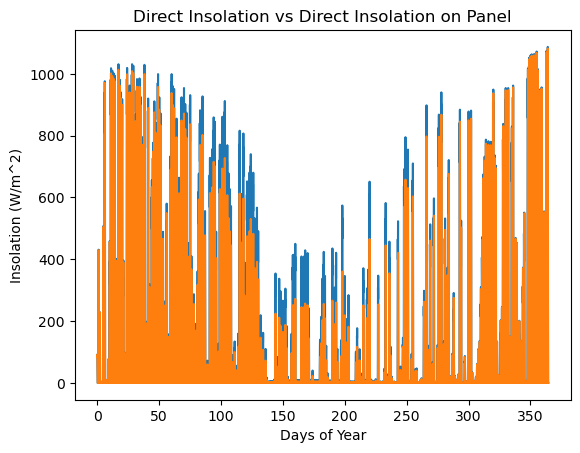

In [30]:
# Plot the direct radiation incident on the panel, compared to the dnr.
plt.plot(day, dnr)
plt.plot(day, direct)
plt.xlabel("Days of Year")
plt.ylabel("Insolation (W/m^2)")
plt.title("Direct Insolation vs Direct Insolation on Panel")

Text(0.5, 1.0, 'Diffuse Insolation vs Diffuse Insolation on Panel')

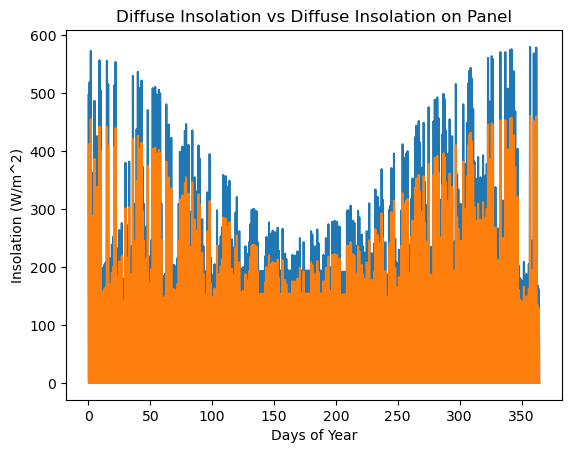

In [31]:
# Plot the diffuse radiation incident on the panel.
plt.plot(day, dhr)
plt.plot(day, diffuse)
plt.xlabel("Days of Year")
plt.ylabel("Insolation (W/m^2)")
plt.title("Diffuse Insolation vs Diffuse Insolation on Panel")

In [32]:
# Table format for radiation on panel.
global_on_plane_month.head(12)

,Total radiation on a tilted plane (KWh/m2)
1990-01-31,5.874343
1990-02-28,5.674074
1990-03-31,4.472128
1990-04-30,3.123093
1990-05-31,1.939135
1990-06-30,1.382685
1990-07-31,1.518736
1990-08-31,1.663839
1990-09-30,2.763048
1990-10-31,3.709397


# Resource / Load Ratio and Worst Month Calculation
***
- Now that both the monthly average radiation on panel, and the average daily load is available, the ratio between the two can be calculated.
- The 'worst' month is defined to be the one with the worst ratio. This is the month we are interested in optimising our system for.
***

### Code

In [33]:
# Convert load units from Wh to KWh for convience.
lo_winter = winter_des_load_energy/1000
lo_summer = summer_des_load_energy/1000

In [34]:
# Create an array for the monthly loads.
index = ['Jan','Feb','Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
load = np.array([lo_summer, lo_summer, lo_summer, lo_winter, lo_winter, lo_winter, lo_winter, lo_winter, lo_winter, lo_summer, lo_summer, lo_summer])

In [35]:
Load_Resource_Ratio = global_on_plane_month.values[:12,0] / load

In [36]:
# Finally, create the table for the ratio between average daily load and average daily radiation for each month.
resource_table = pd.DataFrame({'Irradiation on tilted plane KWh/m2)': global_on_plane_month.values[:12,0], 'Load (KWh/d)':load, 'Ratio (Resource/Load)':Load_Resource_Ratio}, index=index)

In [37]:
# Identify the worst month by finding the lowest resource to load ratio. 
worst_month = resource_table.values[:,2].min()
worst_month

0.3782736942273124

### Load/Resource Table

In [38]:
resource_table

,Irradiation on tilted plane KWh/m2),Load (KWh/d),Ratio (Resource/Load)
Jan,5.874343,4.10325,1.431632
Feb,5.674074,4.10325,1.382824
Mar,4.472128,4.10325,1.089899
April,3.123093,3.65525,0.854413
May,1.939135,3.65525,0.530507
Jun,1.382685,3.65525,0.378274
Jul,1.518736,3.65525,0.415494
Aug,1.663839,3.65525,0.455191
Sep,2.763048,3.65525,0.755912
Oct,3.709397,4.10325,0.904014


# Battery Sizing and PV Array Sizing
***
- In the section, we consider the characterstics of the battery for the system
- The required battery characteristics are calculated for the worst month in terms of load/resource ratio, which is June. Thus the daily energy load for winter will be used
***

## Battery Sizing

- The maximum depth of discharge permissible for the battery is depenent on the type of battery, with Silicon batteries having the greatest allowable depth of discharge. Silicon batterys can be safely discharged to 10% state of charge.
- The temperature correction factor is dependent on a specific battery selected and the temperature of the region. 
- We choose 3 days of autonomy to be sufficient for the system, as it supplies somewhat essential devices such as a fridge and lighting. In the past, there are an average of [10 consecutive days](https://tinyurl.com/mtyfma7r) of rain per year, around April - July. A 4kWh system like this one will produce around [400 - 800 Wh](https://tinyurl.com/4drv3hp5) on a rainy day. This means that, if it is fully charged before the period of rainy days, it can sustain the load for around 5 days with 3 days of autonomy (3 days from battery + 2 days from generated power). As this would be under heavy rain conditions, and typically we would not get 10 days of continous heavy rain in the year, we can assume oversizing the system by 3 days of autonomy is sufficient. We will later see, that in our example year of 1990, this is indeed enough to sustain the system.
- The chosen battery is the VOLTX 12V 100AH LITHIUM BATTERY. The specifics of the battery are listed in the conclusion of the report.

### Code

In [39]:
# Battery capacity required in Ah, take the load in Ah and divide by the voltage and I = P/V. 
des_load_ah_battery_sizing = winter_des_load_energy/Vdc

# Days of autonomy, length of time system should run without additional insolation. 
t_aut = 3

# Depth of discharge, minimum percentage of battery charge permissible. MUST JUSTIFY 
dod_max = 0.85

# Nominal battery discharge rate
nominal_battery_discharge_rate = 100

# Battery operating temperature, calculated from minimum temp from weather data
temp = pd.DataFrame({'Temperature':wd["Dry Bulb Temperature {C}"].values}, index=date)
daily_mean_temp = temp.resample('D').mean()
min_daily_mean_temp = daily_mean_temp.min()

# Temperature Correction Factor. See chosen battery datasheet in appendix.
temperature_correction_factor = 0.95

In [40]:
# Formula taken from lectures (see https://tinyurl.com/74ppnzvn, slide 43).
req_battery_capacity = des_load_ah_battery_sizing * t_aut / (dod_max*temperature_correction_factor)

In [41]:
# Characteristics of the selection battery block. See 
sel_cell_block = 'VOLTX 12V 100AH LITHIUM BATTERY'
sel_cell_block_capacity_at_nom_discharge = 100
sel_cell_block_voltage = 12

In [42]:
# Number of battery blocks in series and parallel, depending on individual block characteristics
no_strings_in_parallel = np.ceil(req_battery_capacity/sel_cell_block_capacity_at_nom_discharge)
no_of_cells_in_series = Vdc/sel_cell_block_voltage

In [43]:
# Projected days of autonomy from full charge
C100 = sel_cell_block_capacity_at_nom_discharge
days_autonomy = no_strings_in_parallel * dod_max * C100 * temperature_correction_factor / des_load_ah_battery_sizing

In [44]:
# Nominal Daily DOD, assuming full charge at the begining of the day
dod_d = des_load_ah_battery_sizing / C100
# Total Battery Bank Capacity
total_battery_capacity = sel_cell_block_capacity_at_nom_discharge*no_strings_in_parallel

In [45]:
# Create Table to Display Battery Sizing Characterisics
item = ["Design Load Energy Required", 
        "Required Days of Autonomy", 
        "Maximum Depth of Discharge Allowed", 
        "Battery Module Name", 
        "Temperature Correction Factor",
        "Required Battery Capacity",
        "Selected Battery Capacity at C100",
        "Selected Battery Voltage",
        "Number of Modules in Series",
        "Number of Module Strings in Parallel",
        "Total Battery Bank Capacity",
        "Projected Days of Autonomy"]

value = [des_load_ah_battery_sizing, t_aut, dod_max, sel_cell_block, temperature_correction_factor, 
         req_battery_capacity, sel_cell_block_capacity_at_nom_discharge, sel_cell_block_voltage, no_of_cells_in_series,
         no_strings_in_parallel, total_battery_capacity, days_autonomy]

unit = ['Ah','','','','','Ah','Ah','V','','','Ah','']

battery_size_table = pd.DataFrame(list(zip(item,value,unit)), columns = ['Battery Bank Property','Value','Unit'])


### Battery Sizing Table

In [46]:
battery_size_table

,Battery Bank Property,Value,Unit
0,Design Load Energy Required,152.302083,Ah
1,Required Days of Autonomy,3,
2,Maximum Depth of Discharge Allowed,0.85,
3,Battery Module Name,VOLTX 12V 100AH LITHIUM BATTERY,
4,Temperature Correction Factor,0.95,
5,Required Battery Capacity,565.828173,Ah
6,Selected Battery Capacity at C100,100,Ah
7,Selected Battery Voltage,12,V
8,Number of Modules in Series,2.0,
9,Number of Module Strings in Parallel,6.0,


## PV Array Sizing
- We assume a manufacturing tolerence of 1 (fman) and a mismatch coefficient of 1. 
- We note that thredo is a rain-forest, mountainous location with minimal particulate matter and high wind, which limits the effects of dust and dirt degrading the performance of the panel. Thus we assume a dirt coefficient of 
- The chosen solar panel is the Letovo Solar HE-300. The specifics of the panel are listed in the conclusion of the report.

### Code

In [47]:
# PV Array and Variables, taken from the chosen panel datasheet (see appendix) or otherwise assumed as mentioned above
f0 = 1
Eff_coul = 0.9
module_name = "Letovo Solar HE-300"
pstc = 300
Voc = 40.07
Isc = 9.88
Vmp = 32.9
Imp = 9.12
fdirt = 0.95
fman = 1
tstc = 25
gamma = -0.005

In [48]:
# Irradiation on a tiled plane, sized for the worst month
Htilt = np.array([global_on_plane_month.values[:12,0].min(), 
                  global_on_plane_month.values[:12,0].max(), 
                  global_on_plane_month.values[:12,0].mean()])

des_load_array_size = np.array([load.max(), load.min(), load.mean()])

des_load_Ah = des_load_array_size / Vdc

required_array_output = des_load_Ah / Eff_coul

# Temperature Derating Factor of the Array, first calculate the average hourly temperature accross year, and then issolate only the 
# daytime hours.
Thour = pd.DataFrame({'Temperature {C}':wd["Dry Bulb Temperature {C}"].values, 'Hour':wd["Hour"].values}, index=date)
hourly_avg_tem=Thour.groupby('Hour').mean()
hourly_avg_tem[0:6]=np.nan
hourly_avg_tem[-6:]=np.nan
daytime_avg_tem = hourly_avg_tem.mean()
ftemp = 1 - (((daytime_avg_tem[0] + 25 - tstc) * gamma) / 100)

# Derated power output of module at 1000W/m^2 of solar insolation
Pmod = pstc * ftemp * fdirt * fman
Etot = load.max() * 1000

# We consider only the minimum solar insolation on plane for calculation, to slightly oversize the system.
Htilt = Htilt.min()

# Number of panels required to meet the daily energy requirements in the worst month. We consider how much of the total load each 
# individual panel is able to supply.
N = np.floor((Etot * f0) / (Pmod * Htilt)) 

In [49]:
# Total average daily energy generated by the entire array in the worst month. 
Epv = Pmod * Htilt * N

In [50]:
# Create Table
item = ["Oversupply coefficient", 
        "Nominal battery efficiency (Coulombic)", 
        "Selected Module", 
        "Power at STC", 
        "Open Circuit Voltage",
        "Short Circuit Current",
        "Voltage at MPP",
        "Current at MPP",
        "Derating Factor for Soiling",
        "Manufacturing Tolerance",
        "Derated Power at STC",
        "Average Power in Worst Month",
        "Number of Panels"]

value = [f0, Eff_coul, module_name, pstc, Voc, Isc, Vmp, Imp, fdirt, fman, Pmod, Pmod * Htilt, N]

unit = ['','','','W','V','A','V','A','','','W','W','']

PV_array_sizing_table = pd.DataFrame(list(zip(item,value,unit)), columns = ['PV Array Property','Value','Unit'])

### PV Array Sizing Table

In [51]:
PV_array_sizing_table

,PV Array Property,Value,Unit
0,Oversupply coefficient,1,
1,Nominal battery efficiency (Coulombic),0.9,
2,Selected Module,Letovo Solar HE-300,
3,Power at STC,300,W
4,Open Circuit Voltage,40.07,V
5,Short Circuit Current,9.88,A
6,Voltage at MPP,32.9,V
7,Current at MPP,9.12,A
8,Derating Factor for Soiling,0.95,
9,Manufacturing Tolerance,1,


# Inverter Sizing
***
- The following section will consider the sizing of the inverter.
- The chosen inverter is FRONIUS PRIMO 5.0-1. Component specifications are given in the conclusion.
***

### Code

In [52]:
# Required inverter maximum concurrent AC demand and surge demand 
Sinv_30 = max_ac_demand 
Sinv_sur = surge_demand

In [53]:
# Inverter qualities adjusted for additional safety factor of 10%. 
Safety_factor = 1.1
Sug_inverter_surge_rating = Sinv_sur * Safety_factor
Sug_inverter_half_hour_max_rating = Sinv_30 * Safety_factor

In [54]:
# Specifications of selected inverter for system design.
Waveform_quality = "Sine"
inverter_type = "Standard, Transformerless"
inverter = "FRONIUS PRIMO 5.0-1"
sel_inverter_half_hour_max_demand  = 5000
sel_inverter_continous_rating = 4600
sel_inverter_surge_rating = 5000

In [55]:
# Create table for properties of inverter, compared against maximal power demands for inverter.
item=["Inverter half hour maximum demand",
      "Inverter surge demand",
      "Safety factor",
      "Suggested Inverter Maximum Demand Rating",
      "Suggested Inverter Surge Demand",
      "Waveform Quality",
      "Inverter Name",
      "Inverter Type",
      "Selected Inverter Maximum Demand",
      "Selected Inverter Continous Rating",
      "Selected Inverter Surge Rating"]

value = [Sinv_30, Sinv_sur, Safety_factor, Sug_inverter_half_hour_max_rating,  Sug_inverter_surge_rating,
         Waveform_quality, inverter, inverter_type, sel_inverter_half_hour_max_demand, sel_inverter_continous_rating,
        sel_inverter_surge_rating]

unit = ['W','VA','','W','VA','','','','W','W','VA']

inverter_size_table = pd.DataFrame(list(zip(item,value,unit)), columns = ['PV Array Property','Value','Unit'])


### Inverter Sizing Table

In [56]:
inverter_size_table

,PV Array Property,Value,Unit
0,Inverter half hour maximum demand,3720.408163,W
1,Inverter surge demand,4490.0,VA
2,Safety factor,1.1,
3,Suggested Inverter Maximum Demand Rating,4092.44898,W
4,Suggested Inverter Surge Demand,4939.0,VA
5,Waveform Quality,Sine,
6,Inverter Name,FRONIUS PRIMO 5.0-1,
7,Inverter Type,"Standard, Transformerless",
8,Selected Inverter Maximum Demand,5000,W
9,Selected Inverter Continous Rating,4600,W


# MPPT and Cable Sizing
***
- In this section, we consider the specifications of the panels to size the maximum power point tracker charger (MPPT) charger.
- Additionally, we consider the current loads experienced by the cables to size them adequately, for safety.
***

## MPPT Sizing
- The MPPT sizing is mostly dependent on the output characteristics of the array, that is, the maximum voltage the array will output, and the maximum current the arrays will output. The MPPT must be capable of handeling these values. Additionally, the output range of the MPPT should contain the desierd system voltage.
- Within the standards, it is recommended that the MPPT is sized such that it can hangle 1.25x the maximum array output current for safety. We will ignore this exact over-sizing as the MPPT has over-current protection. Furthermore, the peak array current output is still less than the maximum MPPT current (50A vs 60A).
- The chosen MPPT is the Vevor 60A MPPT Solar Charge Controller. The specifics of the MPPT are listed in the conclusion of the report.
- We see from the code below that the ideal configuration of the 10 panels in 5 x 2, that is, 2 panels in a string with 5 strings in parallel. A line diagarm is provided in the conclusion of the report showcasing this array configuration.

In [57]:
# Maximum MPPT current and voltage
MPPT_max_current = 60
MPPT_max_voltage = 150

# Maximum panel current and voltage
Panel_max_current = Isc * 1.1
Panel_max_voltage = Voc * 1.1

# Calculate the configuration of the panels 
panel_strings_in_parallel = np.floor(MPPT_max_current / Panel_max_current)
panels_in_string = np.floor(N / panel_strings_in_parallel)
if (panels_in_string * Panel_max_voltage < MPPT_max_voltage): panels_in_string
else: 
    panels_in_string = 'No possible configuration' 
    panel_strings_in_parallel = 'No possible configuration'

# Print array configuration
print(f"The number of strings of panels is: {panel_strings_in_parallel}")
print(f"The number of panels in each string is: {panels_in_string}")

The number of strings of panels is: 5.0
The number of panels in each string is: 2.0


## Cable Sizing 
- Noting the cable voltage drop of 1.512V, and the maximum current of 159A continously, we consult table 4 and table 42 of AS/NZS 3008.1.1 for the required cable sizing.
- Thus, assuming the cables are touching the surface and exposed, we required a two-stranded single-core copper cable of 70mm^2 conductor size for the system to be within the standards, with a allowable currnet of up to 184A and a voltage drop of 0.67V. 
- The chosen cable is: https://tinyurl.com/32k96a53, with a total cost of $620 for 20 meters.

In [58]:
# The maximum current experienced for a sustained time is the maximum dc and ac demand simultaneously running,
# which is the maximum current demand at the DC bus.
dc_current_at_max_demand #A

# The allowable voltage drop across the system is no more than 10% of the system voltage, as per AS/NZS 3008.1.1
allowable_drop = 0.1 * Vdc

# Assume a cable length of 10 meters for the entire system.
cable_length = 20

# Thus, we have the desired cable voltage drop in mV/Am, as per AS/NZS 3008.1.1. The actual drop of the selcted cable can be less.
cable_voltage_drop = (1000 * allowable_drop) / (dc_current_at_max_demand * cable_length)
cable_voltage_drop

0.7560229506967177

# Battery State of Charge Time Series 
***
- This section involves figuring out how the charge of the battery changes over the model year.
- Insights from this analysis indicate the effectivenss of the system components in maintaining the load over the year
- The aim is for the battery to not fall bellow the specific maximum depth of discharge (DOD), which indicates a successful system. In our case, the SOC should remain above 15%.
***

### Code

In [59]:
# Code for calculating time series - We assume battery is charged at begining of day, cable loss is 3%, average inverter efficiency is 85%
# Battery Capacity at end of day = Battery Capacity at Begining of Day + Generating Capacity for Day - Daily Load
# Daily SOC = Battery Capacity at end of day / Battery Capacity

cable_loss_coefficient = 0.97

# Create array of day numbers 
days_of_year = np.array(list(range(366)))


# Calculate the daily Ah generated by the array through the year
daily_Wh_generated = (N) * global_on_plane_daily.values * Pmod * temperature_correction_factor
daily_Ah_generated = daily_Wh_generated / Vdc


# Create Array for daily load in Ah throughout the year (considering summer and winter months)
daily_Ah_load = np.full(366, (summer_des_load_energy / (Vdc * cable_loss_coefficient)))
daily_Ah_load[90:273] = (winter_des_load_energy / (Vdc * cable_loss_coefficient)) # Set winter months to winter load

# Addition alogirithm for SOC array over the year
daily_battery_charge = np.full(366, 0)
i = 0
daily_battery_charge[i] = total_battery_capacity # Assume fully charged on day 1

while (i < 365):
    i = i + 1
    daily_battery_charge[i] = (daily_battery_charge[i-1] + daily_Ah_generated[i] - daily_Ah_load[i])
    if (daily_battery_charge[i] > total_battery_capacity): daily_battery_charge[i] = total_battery_capacity
    if (daily_battery_charge[i] < 0): daily_battery_charge[i] = 0

daily_SOC = (daily_battery_charge/total_battery_capacity)*100

### Battery Yearly SOC Graph

Text(0.5, 1.0, 'Battery SOC over Typical Meterological Year')

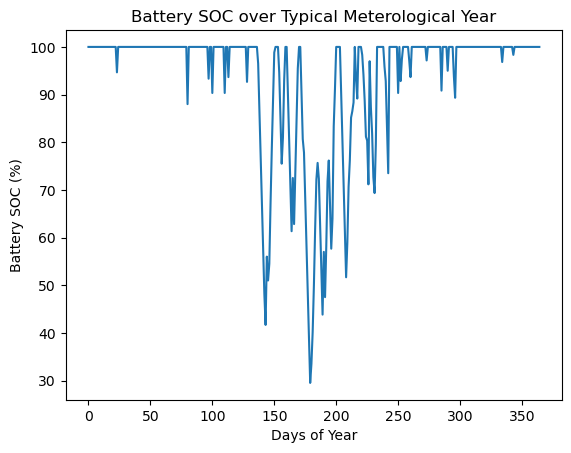

In [60]:
# Plot of SOC Time Series 
SOC_time_series = plt.plot(days_of_year[:365], daily_SOC[:365])
plt.xlabel("Days of Year")
plt.ylabel("Battery SOC (%)")
plt.title("Battery SOC over Typical Meterological Year")

# Performance Metrics: Effectiveness of System 
***
- In this section we consider the economic effectiveness of the system:
- Does it achieve it's goal?
- What is the cost over a long time compared to a genset system?
- What is the payback period for the system? Is it economically viable?
***

## Performance Metrics

### Energy Yield
Total energy generated over the year is 2966.3kWh

In [61]:
# Energy Yield - amount of AC energy generated by the system in a given period (month, year). It is the net generation and includes
# derating factors and system losses. For this we will consider the total energy generated over the year, hence we sum monthly insolation
# We also consider the total system yield, so multiply by the number of panels.
Itilt = (global_on_plane_month.values[:12,0]*30).sum()
Esys = (Pmod * Itilt * inverter_eff * N)/ 1000 
Esys # kWh

2966.293621579566

### Specific Yield
989 kWh per kW per year

In [62]:
# Specific yield - the energy output per rated output of the array, allowing for comparisons between arrays
Specific_Yield = (Esys) / (pstc/1000 * N) 
Specific_Yield #kWh/kW per year  

988.7645405265221

### Performance Ratio
~73.8% for the given system

In [63]:
# Performance Ratio - ratio of actual energy generation to the ideal energy of the array. May be used to measure performance over time, 
# And a drop in performance ratio might indicate an issue with the system such as the panels being covered. 
PR = ftemp * fman * inverter_eff * fdirt * cable_loss_coefficient
PR

0.7376322760730882

### Capacity Factor
~11.3% for the given system

In [64]:
# Capacity Factor - ratio of actual energy generation by the system over a year, to if the system is operated at its nameplate capacity
# For every hour of the year, allowing one to determine the energy "uptime"
CF = (Esys*1000)/(pstc*8760*N)
CF 

0.11287266444366689

## Economic Metrics

### Total System Cost

In [65]:
# For the labor cost, see https://tinyurl.com/3ptbbyfe. For the maintanace cost, see https://tinyurl.com/277md4cs.
solar_array_cost = 3000
inverter_cost = 2100
battery_cost = 6200
MPPT_cost = 210
cable_cost = 620
labor_cost = 300
maintanace_cost = 300

capital_cost = solar_array_cost + inverter_cost + battery_cost + MPPT_cost + cable_cost + labor_cost 

item = ["Solar Array", 
        "Inverter",
        "Battery Bank",
        "MPPT",
        "Cables",
        "Labour",
        "Maintainance",
        "Capital Cost"]

value = [solar_array_cost, inverter_cost, battery_cost, MPPT_cost, cable_cost, labor_cost, maintanace_cost, capital_cost]

reference = ['https://tinyurl.com/54c9ycwp',
             'https://tinyurl.com/3xz4j3jz',
             'https://tinyurl.com/4djs6edp',
             'https://tinyurl.com/mw9pexuj',
             'https://tinyurl.com/32k96a53',
             'https://tinyurl.com/3ptbbyfe',
             'https://tinyurl.com/277md4cs',
             '']

system_cost_table = pd.DataFrame(list(zip(item,value,reference)), columns = ['Item','Cost ($)','Reference'])
system_cost_table

,Item,Cost ($),Reference
0,Solar Array,3000,https://tinyurl.com/54c9ycwp
1,Inverter,2100,https://tinyurl.com/3xz4j3jz
2,Battery Bank,6200,https://tinyurl.com/4djs6edp
3,MPPT,210,https://tinyurl.com/mw9pexuj
4,Cables,620,https://tinyurl.com/32k96a53
5,Labour,300,https://tinyurl.com/3ptbbyfe
6,Maintainance,300,https://tinyurl.com/277md4cs
7,Capital Cost,12430,


### Simple Payback Period
- Time taken for the system to pay itself back, assuming no discounting and comparing against an equivalent genset system (diesel generator system). We assume maintaince costs per year are roughly 300 [https://tinyurl.com/277md4cs] as an upper limit.
- Diesel generator costs are taken from [https://tinyurl.com/2bcf37a9] and [https://tinyurl.com/bdea58f4].
- The 5kW generator can supply the daily electricity need when running at continous output for an hour. As the consumption is 2.1L per hour, we would use 2.1L per day, or 767L per year. With a diesel price of ~2.1 per litre (as of now), the total yearly cost for diesel would be 1600.
- Thus the yearly saving would be 1600 - 300 = 1300. This is ignoring the inital cost of the diesel genset itself.
- We see that the payback period of the system is ~9.5 years, which is less than the least failure time of any components. Thus the system is economically feasible.

In [66]:
yearly_saving = 1300
payback_period = capital_cost / yearly_saving
payback_period

9.561538461538461

### Levelised Cost of Electricity
- Ratio between the lifetime cost of the system and the total energy production over it's lifetime. We assume the discounting rate to be 5%.
- We assume the lifetime of the system to be 25 years. The lifetime of the inverter is 10-15 years and the lifetime of the battery is 10-15 years (see lectures).
- We take the most likely scenario and assume that both the inverter and battery system is replaced once during the lifetime of the system.
- Standard maintance costs per year are assumed to be 300 per year as in the previous section.
- Lastly, we assume the energy generated each year to be the same as our example year of 1990.
- With these assumptions, we obtain the LCOE as $0.48 / kWh.

In [67]:
# Discounting rate.
r = 0.05

# Costs each year at the present value.
yearly_system_costs = [capital_cost, maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost,
                       maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost,
                       maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost,
                       maintanace_cost + inverter_cost + battery_cost, maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost,
                       maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost, maintanace_cost]

# Energy generated each year. 
yearly_system_energy = [Esys] * 25

total_lifetime_costs = 0
total_electricity_generated_lifetime = 0

# Calculate the lifetime costs. 
n = 0
while (n < 24):
    
    total_lifetime_costs = total_lifetime_costs + (yearly_system_costs[n] / ((1 + r)**n))
    n = n + 1
    
# Calculate the lifetime energy generated.
n = 0
while (n < 24):
    
    total_electricity_generated_lifetime = total_electricity_generated_lifetime +  (yearly_system_energy[n] / ((1 + r)**n))
    n = n + 1 
    
LCOE = total_lifetime_costs / total_electricity_generated_lifetime
LCOE

0.4762742995918606

# Optimising Panel Angle 

## Optimising Beta Angle

- Here we optimise beta angle by considering how the insolation on the tiled plane changes with beta.
- As we see, the maximum insolation occurs around beta = 0, which indicates that a flat planel would be most efficient.

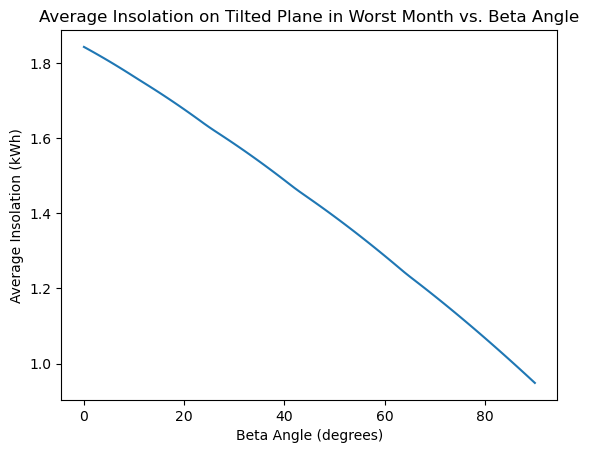

In [77]:
# Graphing average insolation on tilted plane in worst month, as a function of beta


# Create array of beta values and empty array for radiation values
beta_angle = np.array(list(range(91)))
insolation_beta = [0] * 91


# Begin Loop
i = -1
while (i < 90):
    
    # Increment Counter
    i = i + 1
    
    b_r = np.radians(beta_angle[i])

    # Calculate the direct radiation incident on the panel as a function of the angle of the panel, beta.
    direct = dnr.values[:,0]*np.array((np.sin(d_r)*np.sin(l_r)*np.cos(b_r) 
                         + np.sin(d_r)*np.cos(l_r)*np.sin(b_r)*np.cos(PA_r)
                         + np.cos(d_r)*np.cos(l_r)*np.cos(b_r)*np.cos(HRA_r)
                         - np.cos(d_r)*np.sin(l_r)*np.sin(b_r)*np.cos(PA_r)*np.cos(HRA_r)
                         + np.cos(d_r)*np.sin(b_r)*np.sin(PA_r)*np.sin(HRA_r)))
    # Ensure only non-negative values of direct radiation are kept.
    direct = np.where(direct > 0, direct, 0)


    # Calculate the diffuse radiation incident on the panel as a function of the angle of the panel, beta.
    diffuse = dhr.values*(180 - beta_angle[i])/180
    diffuse[:,0]

    # Add the direct and diffuse radiation for daily total radiation on plane.
    global_insolation = diffuse[:,0] + direct

    # Resample data to obtain the monthly average for daily insolation on the panel, which can be compared to the daily average load.
    global_on_plane = pd.DataFrame({'Total radiation on a tilted plane (KWh/m2)': global_insolation/1000}, index=date)
    global_on_plane_daily = global_on_plane.resample('D').sum()
    global_on_plane_month = global_on_plane_daily.resample('M').mean()
    
    # Save value in array
    insolation_beta[i] = (global_on_plane_month['Total radiation on a tilted plane (KWh/m2)'].values[6])
    

# Plot of Insolation vs. Beta Angle 
insolation_vs_beta = plt.plot(beta_angle, insolation_beta)
plt.xlabel("Beta Angle (degrees)")
plt.ylabel("Average Insolation (kWh)")
plt.title("Average Insolation on Tilted Plane in Worst Month vs. Beta Angle")


# Set insolation values back to original 
beta = 37
b_r = np.radians(beta)
direct = dnr.values[:,0]*np.array((np.sin(d_r)*np.sin(l_r)*np.cos(b_r) 
                     + np.sin(d_r)*np.cos(l_r)*np.sin(b_r)*np.cos(PA_r)
                     + np.cos(d_r)*np.cos(l_r)*np.cos(b_r)*np.cos(HRA_r)
                     - np.cos(d_r)*np.sin(l_r)*np.sin(b_r)*np.cos(PA_r)*np.cos(HRA_r)
                     + np.cos(d_r)*np.sin(b_r)*np.sin(PA_r)*np.sin(HRA_r)))
direct = np.where(direct > 0, direct, 0)
diffuse = dhr.values*(180 - beta_angle)/180
diffuse[:,0]
global_insolation = diffuse[:,0] + direct
global_on_plane = pd.DataFrame({'Total radiation on a tilted plane (KWh/m2)': global_insolation/1000}, index=date)
global_on_plane_daily = global_on_plane.resample('D').sum()
global_on_plane_month = global_on_plane_daily.resample('M').mean()

## Optmising Azumith

- Here we optimise Azumith angle, for any beta angle other than 0 degrees. For beta = 0, the panel is flat and hence the azumith makes no difference.
- We see, from the calculator, that Azumith = 0 degrees, or pointing directly north, would be most effective for any beta angle. This makes sense as the sun is always in the northen part of the sky in this part of australia. 

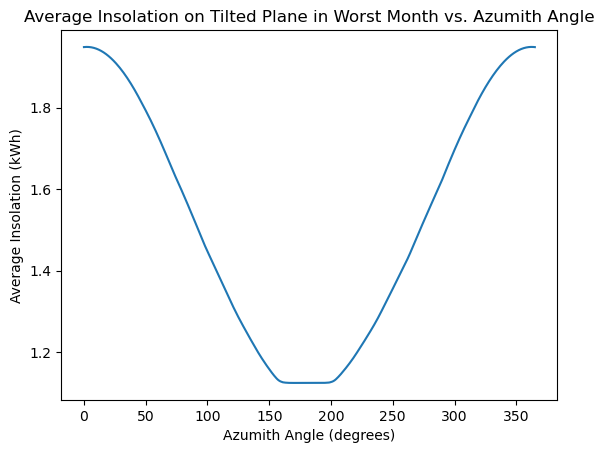

In [79]:
# Graphing average insolation on tilted plane in worst month, as a function of beta

# Create array of beta values and empty array for radiation values
azumith_angle = np.array(list(range(366)))
insolation_azumith = [0] * 366

# Begin Loop
i = -1
while (i < 365):
    
    # Increment Counter
    i = i + 1
    
    PA_r = np.radians(azumith_angle[i])

    # Calculate the direct radiation incident on the panel as a function of the angle of the panel, beta.
    direct = dnr.values[:,0]*np.array((np.sin(d_r)*np.sin(l_r)*np.cos(b_r) 
                         + np.sin(d_r)*np.cos(l_r)*np.sin(b_r)*np.cos(PA_r)
                         + np.cos(d_r)*np.cos(l_r)*np.cos(b_r)*np.cos(HRA_r)
                         - np.cos(d_r)*np.sin(l_r)*np.sin(b_r)*np.cos(PA_r)*np.cos(HRA_r)
                         + np.cos(d_r)*np.sin(b_r)*np.sin(PA_r)*np.sin(HRA_r)))
    # Ensure only non-negative values of direct radiation are kept.
    direct = np.where(direct > 0, direct, 0)


    # Calculate the diffuse radiation incident on the panel as a function of the angle of the panel, beta.
    diffuse = dhr.values*(180 - beta)/180
    diffuse[:,0]

    # Add the direct and diffuse radiation for daily total radiation on plane.
    global_insolation = diffuse[:,0] + direct

    # Resample data to obtain the monthly average for daily insolation on the panel, which can be compared to the daily average load.
    global_on_plane = pd.DataFrame({'Total radiation on a tilted plane (KWh/m2)': global_insolation/1000}, index=date)
    global_on_plane_daily = global_on_plane.resample('D').sum()
    global_on_plane_month = global_on_plane_daily.resample('M').mean()
    
    # Save value in array
    insolation_azumith[i] = global_on_plane_month['Total radiation on a tilted plane (KWh/m2)'].values[6]
    
    
    
# Plot of Insolation vs. Beta Angle 
insolation_vs_azumith = plt.plot(azumith_angle, insolation_azumith)
plt.xlabel("Azumith Angle (degrees)")
plt.ylabel("Average Insolation (kWh)")
plt.title("Average Insolation on Tilted Plane in Worst Month vs. Azumith Angle")
    
# Set insolation values back to original 
panel_azimuth = 90
PA_r = np.radians(panel_azimuth) 
direct = dnr.values[:,0]*np.array((np.sin(d_r)*np.sin(l_r)*np.cos(b_r) 
                     + np.sin(d_r)*np.cos(l_r)*np.sin(b_r)*np.cos(PA_r)
                     + np.cos(d_r)*np.cos(l_r)*np.cos(b_r)*np.cos(HRA_r)
                     - np.cos(d_r)*np.sin(l_r)*np.sin(b_r)*np.cos(PA_r)*np.cos(HRA_r)
                     + np.cos(d_r)*np.sin(b_r)*np.sin(PA_r)*np.sin(HRA_r)))
direct = np.where(direct > 0, direct, 0)
diffuse = dhr.values*(180 - beta)/180
diffuse[:,0]
global_insolation = diffuse[:,0] + direct
global_on_plane = pd.DataFrame({'Total radiation on a tilted plane (KWh/m2)': global_insolation/1000}, index=date)
global_on_plane_daily = global_on_plane.resample('D').sum()
global_on_plane_month = global_on_plane_daily.resample('M').mean()

## Optimal Panel Angle Conclusion

We note that the optimal beta angle would be 0 degrees and the optimal azumith angle would be 0 degrees. Thus a flat panel facing north would collect the most radiation in the least month, and thus reduce the number of panels required to meet the system load. 

Taking beta = 0 and azumith = 0, we see that the maximum amount of irradiation we are able to capture (in june) is 1.843155 kWh per day. With the roof-mounted position of beta = 37 and azumith = 90, this value is 1.382685. Thus with this new mounting position, there is a ~33% increase in captured irradiation and a corresponding 33% increase in power produced by the solar array. Correspondingly, it follows that only 75% of the current number of panels are required to generated the same power. 
- Hence, if the panels were ground mounted, roughly 2 less panels may be required. This is a cost reduction of $600. However, as seen [here](https://www.paradisesolarenergy.com/blog/whats-the-cost-of-a-ground-mount-solar-panels), ground-mounted arrays can cost significantly more to instal than roof-mounted.
- Thus, with sound logic, we conclude that the cost reduction in reducing the number of solar panels is not worth the additional cost of installing ground-mounted solar, and thus we keep the panels fixed to their position of beta = 37 and azumith = 90.

That concludes the panel angle optimisation section.

# Conclusion
In this section, we summarise our results and conclude the report by evaluating the effectiveness of the system. Firstly, we note the summary of the components required for the system below. The panels will be roof mounted as discussed to reduce overall project cost and complexity, as discussed.

| Component    | Name                                   | Properties                                                            | Quantity | Total Item Cost | Reference                    |
|--------------|----------------------------------------|-----------------------------------------------------------------------|----------|-----------------|------------------------------|
| Solar Panels | Letovo Solar HE-300                    | 300W at STC, 285W derated, Voc = 40.07, Isc = 9.88,                   | 10       | 3000            | https://tinyurl.com/54c9ycwp |
| Battery      | VOLTX 12V 100AH LITHIUM BATTERY        | 12.8V, 100 Ah at C100                                                 | 12       | 6200            | https://tinyurl.com/4djs6edp |
| Inverter     | FRONIUS PRIMO 5.0-1                    | 5000 W maximum demand rating, 5000 VA surge rating, Sine-wave quality | 1        | 2100            | https://tinyurl.com/3xz4j3jz |
| MPPT         | Vevor 60A MPPT Solar Charge Controller | 150V max input voltage, 60A max input current, 12-48V output          | 1        | 210             | https://tinyurl.com/mw9pexuj |
| Cables       | SBP Electrical 00 Gauge 1 Meter Cable  | N/A                                                                   | 20       | 620             | https://tinyurl.com/32k96a53 |
| Total Cost   |                                        |                                                                       |          | 12430           |                              |

As we see, the total cost for the system is $12000. Additionally, the labor costs are [] and the maintance costs are []. Next, provided below is the line diagram for the system - showcasing the system layout and connections between components. Note the series and parallel buses for the PV modules and the batteries. 

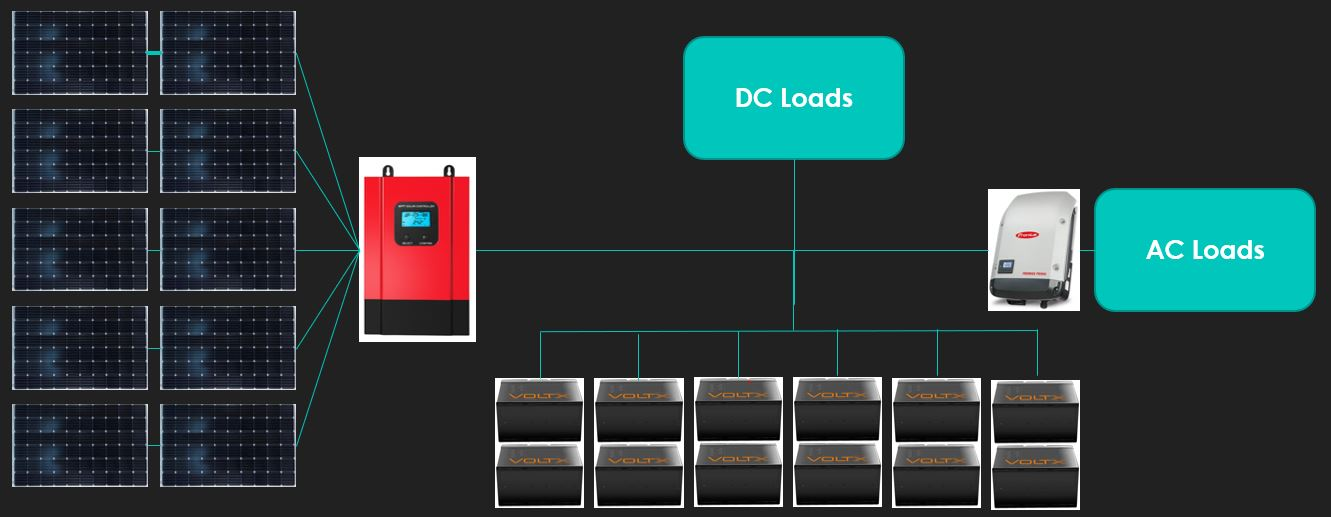

In [80]:
Image(filename='line_diagram.jpg') 

In the table below, we note the performance metrics of the system, where reference values are also given.

| Performance Metric    | System Value | Typical Value                     | Reference                    | Units    | Comments                                                                                                           |
|-----------------------|--------------|-----------------------------------|------------------------------|----------|--------------------------------------------------------------------------------------------------------------------|
| Energy Yields         | 2966         | Variable - Depends on System Size |                              | kWh/Y    | N/A                                                                                                                |
| Specific Yields       | 989          | 1424                              | https://tinyurl.com/32wr63hf | kWh/kW/Y | Lower than the Sydney average, although Thredbo receives less insolation than most of Sydney so  this is expected. |
| Performance Ratio     | 73.8%        | 72%                               | https://tinyurl.com/4etw5c6y |          | Value only available for large-scale solar farm, however still a decent comparision.                               |
| Capacity Factor       | 11.3%        | ~20%                              | https://tinyurl.com/4za3mt68 |          | Given value is for a "good site", which would have more sunlight hours on average than Thredbo.                    |
| Total System Cost     | 12430        | 15000-25000                       | https://tinyurl.com/bderehwe | $        | N/A                                                                                                                |
| Simple Payback Period | 9.56         | Variable - Depends on System Size |                              | Y        | N/A                                                                                                                |
| LCOE                  | 47.6         | 15-20                             | https://tinyurl.com/2cethwy6 | c/kW    | Only simple LCOE has been calculated - a more  thorough calculation would include additional  factors.             |

From the above table, we see that the system performs quite well in all regards in comparison to a traditional PV system installed in Sydney. In addition to these performance metrics, the battery SOC graph is presented below.

Text(0.5, 1.0, 'Battery SOC over Typical Meterological Year')

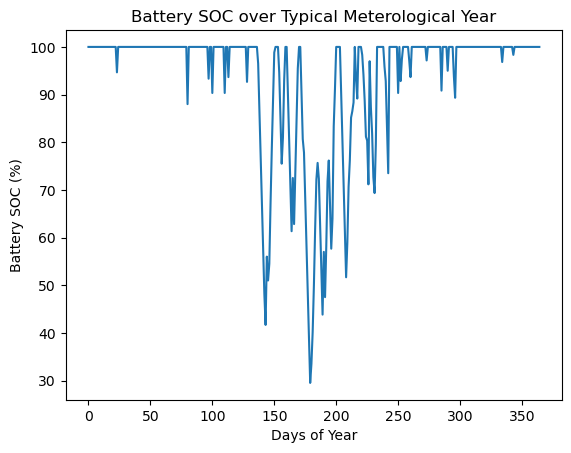

In [81]:
SOC_time_series = plt.plot(days_of_year[:365], daily_SOC[:365])
plt.xlabel("Days of Year")
plt.ylabel("Battery SOC (%)")
plt.title("Battery SOC over Typical Meterological Year")

We see from this graph that the system is able to meet the availability requirements, which was a primary goal of the project. Thus, our system has met both the system availability goal and is economically viable. It compares decently against the typical residential solar installation. Points of improvement would be

This concludes the report. Thank you for reading!

# Appendicies

## Component Datasheets/Specifications

### Batteries

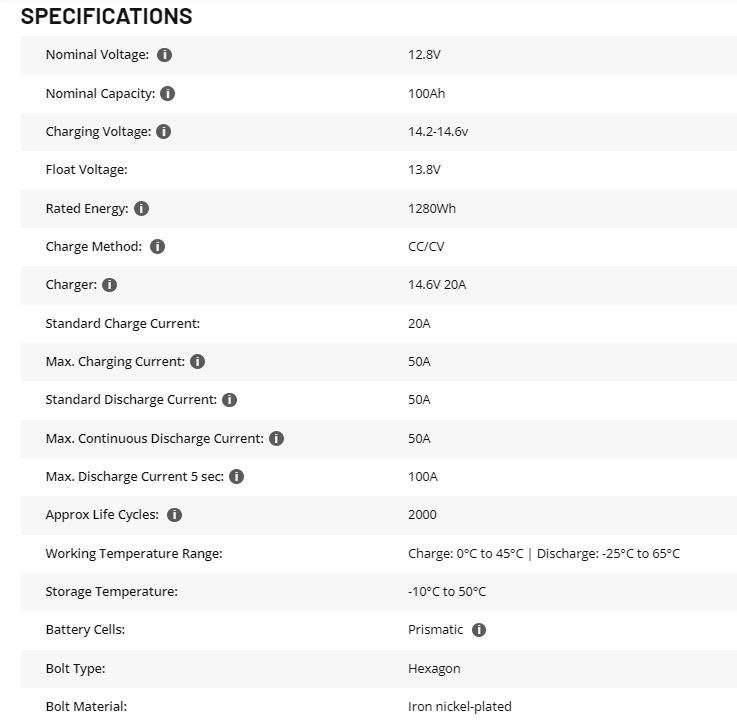

In [82]:
Image(filename='battery_spec_sheet.jpg') 

### Inverter

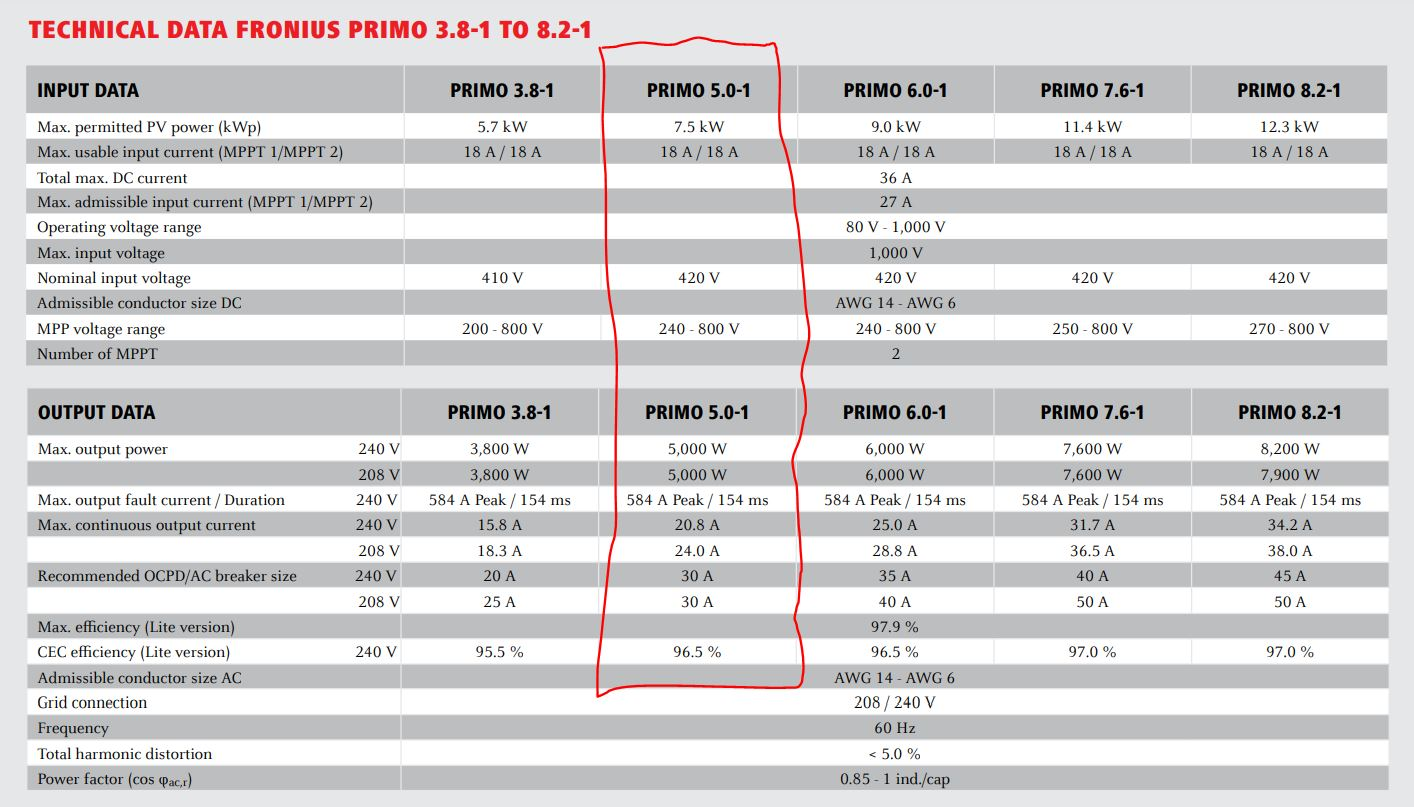

In [83]:
Image(filename='inverter_spec_sheet.jpg') 

### Solar Panel

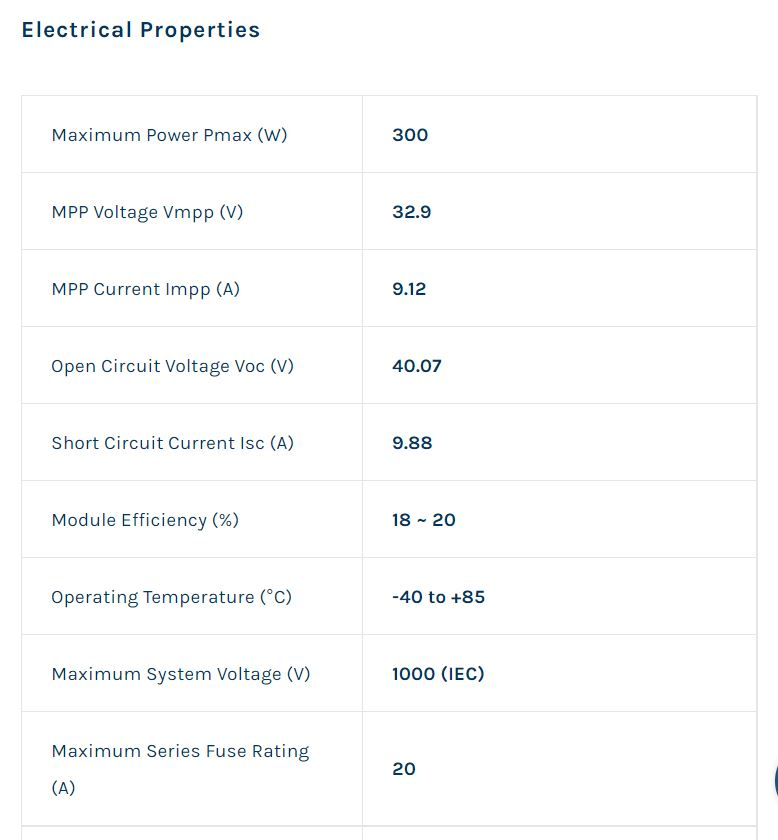

In [86]:
Image(filename='solar_panel_spec_sheet.jpg') 

### MPPT

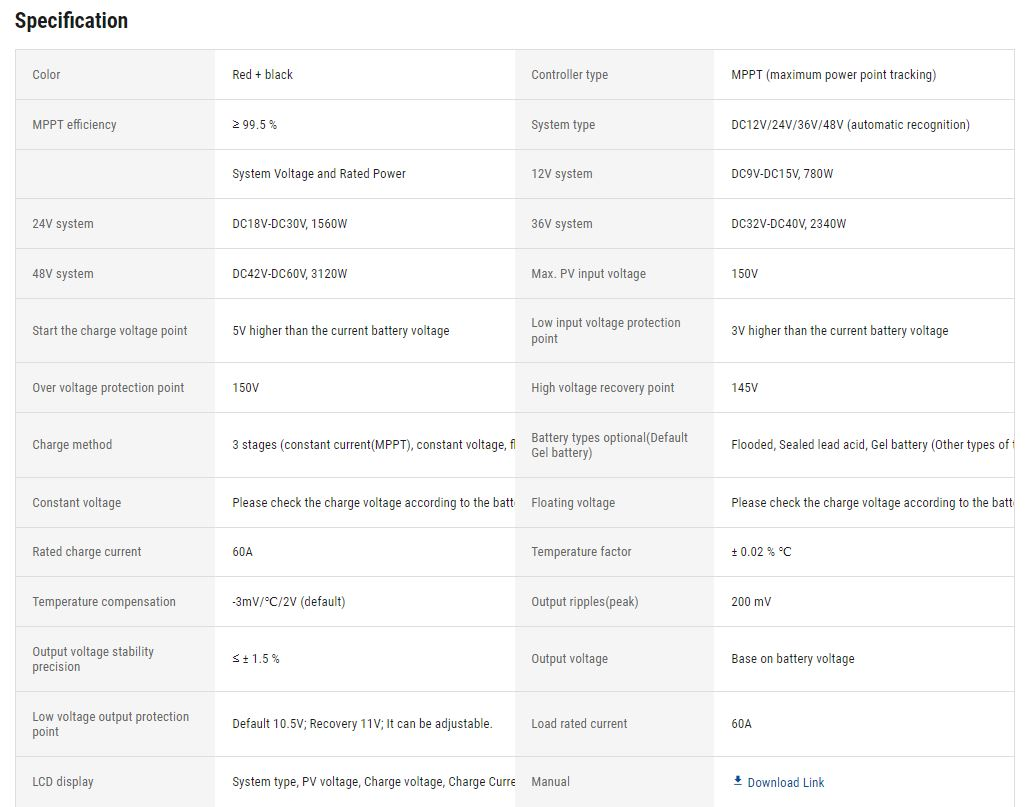

In [87]:
Image(filename='MPPT_spec_sheet.jpg') 

## Standards 

### AS/NZS 3008.1.1 - Cable Design and Sizing Standards 

Read more [here](https://drive.google.com/file/d/1u4Ac3ltUkmbzYlql-dq-VFI5x8aNS3KC/view?usp=sharing)

### AS/NZS 4509.2 - PV System Design Standards

Read more [here](https://drive.google.com/file/d/12Ns983dxSJmneba0phzZFmQZNFnqWPIt/view?usp=sharing)